<h1>Activity 3 - Dengue Cases Data Analytics</h1>
<hr>
<h3>Analyst: John Oliver A. Liwanag</h3>

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [3]:
dengue = pd.read_csv('datasets\\dengue.csv')
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [6]:
dengue['Year'] = dengue['Year'].astype('int')

In [7]:
dengue.dtypes

Month            object
Year              int32
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<hr>
<h1>Questions:</h1>
<h3>1. How did the number of dengue cases change over the years?</h3>

In [9]:
yearly_cases = dengue.groupby(['Year'])['Dengue_Cases'].sum().reset_index()
yearly_cases

,Year,Dengue_Cases
0,2016,209544
1,2017,154155
2,2018,250783
3,2019,441902
4,2020,91041


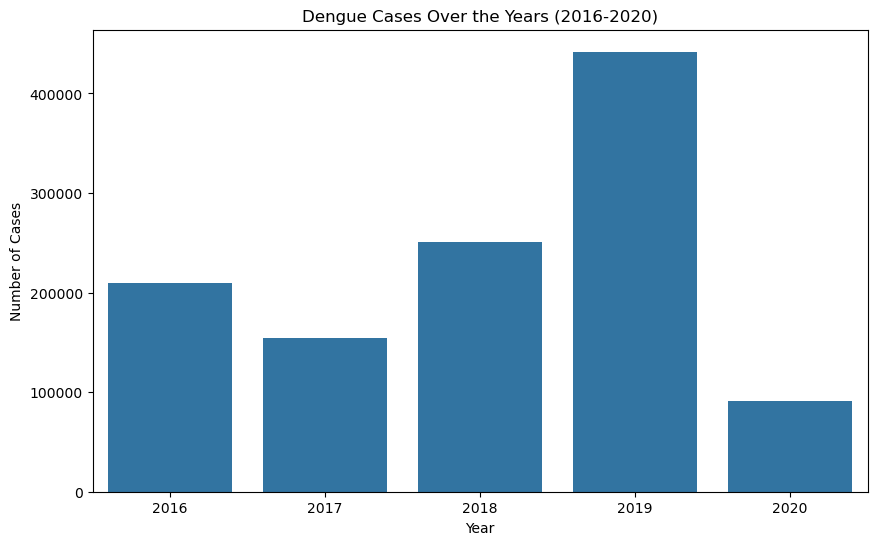

In [10]:
sns.barplot(x='Year', y='Dengue_Cases', data=yearly_cases)
plt.title('Dengue Cases Over the Years (2016-2020)')
plt.xticks(rotation=0)
plt.ylabel('Number of Cases')
plt.gcf().set_size_inches(10,6)
plt.show()

<h1>Insights: </h1>

1. The visualization shows that the year with the highest dengue cases is 2019, with a record of 441,902 cases happening that year, possibly due to environmental or health-related factors.
2. A big drop then happens after 2019, as it goes from over 400,000 to only having less than 100,000 next year, this might be because of the COVID-19 pandemic that happened in 2020, as lockdowns may have reduced mosquito bites outside.

<hr>

<h3>2. What is the total dengue cases, deaths and overall fatality rate?</h3>

In [13]:
total_cases = dengue['Dengue_Cases'].sum()
total_deaths = dengue['Dengue_Deaths'].sum()

fatality_rate = (total_deaths / total_cases) * 100

print(f"Total number of cases: {total_cases}")
print(f"Total number of deaths: {total_deaths}")
print(f"Overall Fatality Rate: {fatality_rate:.2f}%")

Total number of cases: 1147425
Total number of deaths: 16844
Overall Fatality Rate: 1.47%


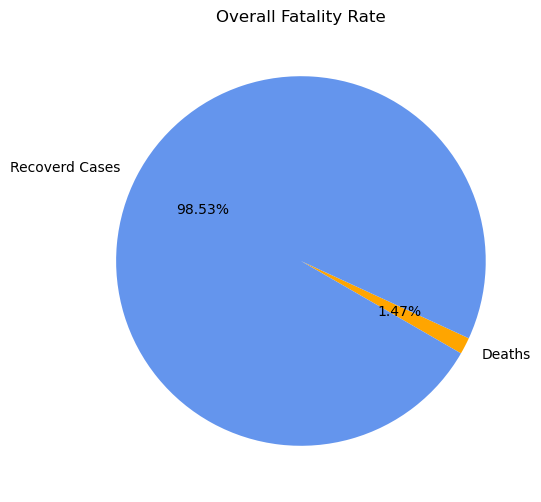

In [46]:
recovered_cases = total_cases - total_deaths

values = [total_deaths, recovered_cases]
labels = ['Deaths', 'Recoverd Cases']

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.2f%%', startangle=-30, colors=['orange', 'cornflowerblue'])
plt.title('Overall Fatality Rate')
plt.show()

<h1>Insights: </h1>

3. From 2016-2020, a total of 1,147,425 cases were recorded with about 16,844 of that resulting in death.
4. The overall fatality rate is 1.47% which shows that only a small number of people with dengue die because of it, but with the large amount of cases, the number of deaths is still high.

<hr>

<h3>3. Which months record the highest number of dengue cases?</h3>

In [17]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby(['Month', 'Year'])['Dengue_Cases'].sum()
monthly_cases

Month      Year
January    2016    17052
           2017    15623
           2018    12657
           2019    20672
           2020    18324
February   2016    12386
           2017     9872
           2018    10466
           2019    25494
           2020    19583
March      2016     9300
           2017     7696
           2018     7944
           2019    19798
           2020    12838
April      2016     7269
           2017     6343
           2018     6860
           2019     9252
           2020     2784
May        2016     8092
           2017     4853
           2018     6594
           2019    10387
           2020     2461
June       2016    10831
           2017     7589
           2018    11502
           2019    25523
           2020     2665
July       2016    29744
           2017    18340
           2018    30363
           2019    55220
           2020     4575
August     2016    36195
           2017    25039
           2018    34210
           2019    85038
         

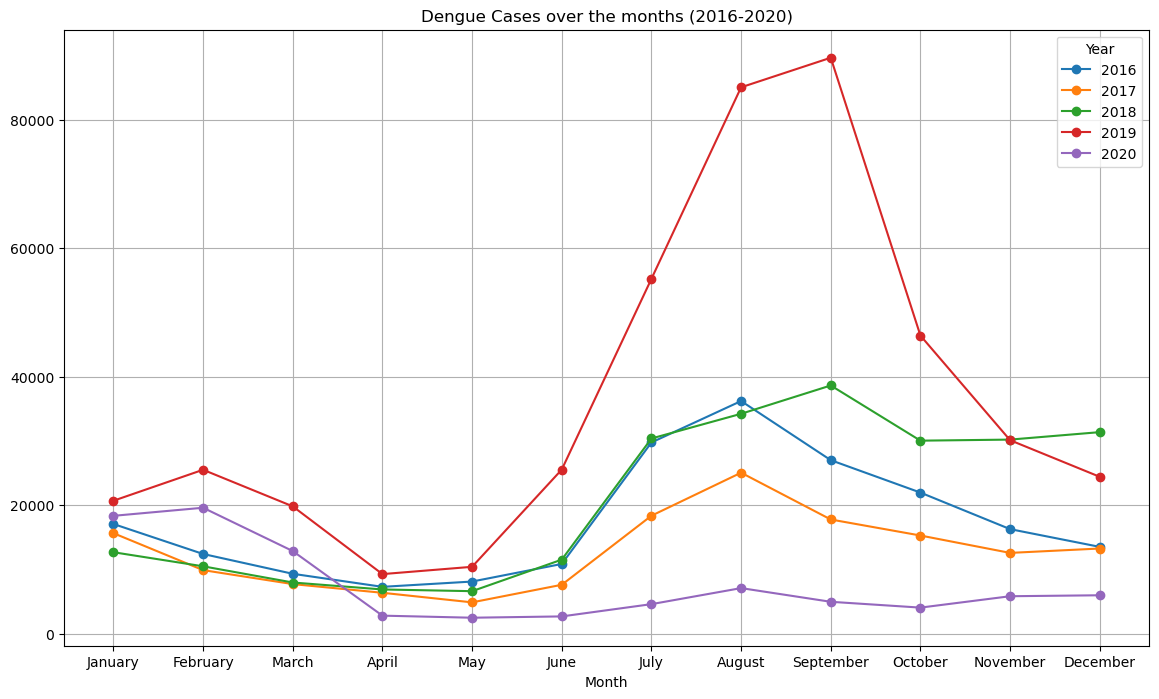

In [18]:
monthly_cases.unstack().plot(kind='line', marker='o')
plt.title('Dengue Cases over the months (2016-2020)')
plt.gcf().set_size_inches(14,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()

<h1>Insights: </h1>

5. For most of the years, dengue cases experience an increase going in to the month of July and all the way to September, likely connected to the rainy season which is when mosquito breeding increases.
6. The highest cases happened in the year 2019, going over 80,000 cases in just one month for both August and September, which indicates a major outbreak during that time.

<hr>

<h3>4. Which regions have the highest mortality rate?</h3>

In [49]:
Regional_Death = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()

Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)
Regional_Death = Regional_Death.sort_values('Mortality_Rate', ascending=False)
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases,Mortality_Rate
15,Region XII,2796,59802,4.68
2,NCR,4008,115966,3.46
1,CAR,1008,30582,3.30
0,BARMM,332,11537,2.88
16,Region XIII,966,35293,2.74
11,Region VII,1760,110683,1.59
10,Region VI,1825,117523,1.55
14,Region XI,385,32522,1.18
12,Region VIII,585,51983,1.13
8,Region IX,532,47781,1.11


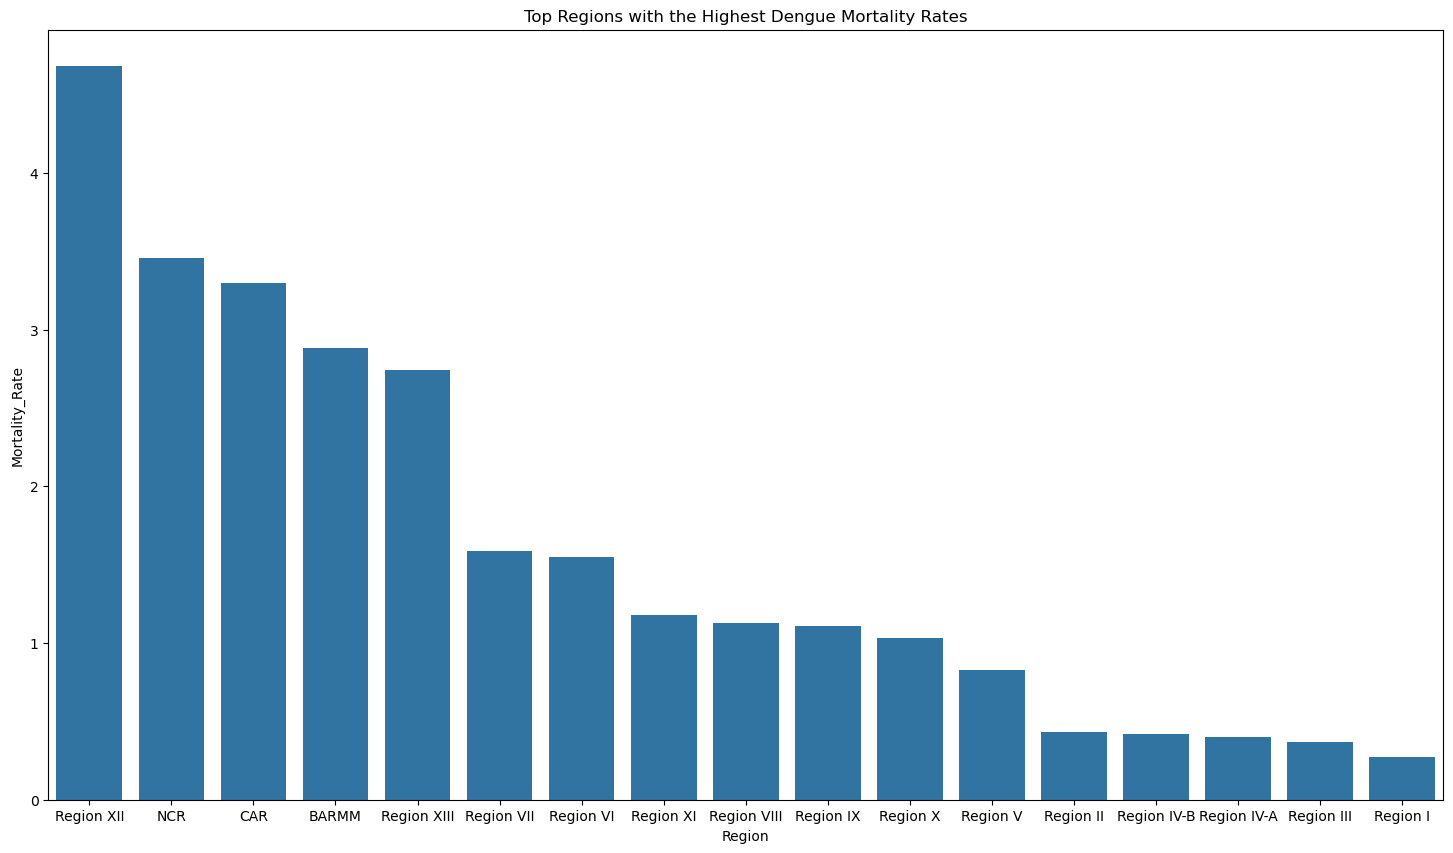

In [51]:
sns.barplot(x='Region', y='Mortality_Rate', data=Regional_Death)
plt.title('Top Regions with the Highest Dengue Mortality Rates')
plt.xticks(rotation=0)
plt.gcf().set_size_inches(18,10)
plt.show()

<h1>Insights: </h1>

7. Region XII has the highest mortality rate with 4.68%, showing that despite having fewer cases than some regions, a larger portion of patients died from dengue. This could point to limited healthcare access or delayed treatment.
8. Meanwhile, regions like Region VI-A and Region III have some of the lowest mortality rates having less than 0.5% despite having the most cases, which may reflect more effective healthcare response and disease control efforts.

<hr>

<h3>5. Do months with higher cases also experiencing high fatalitites?</h3>

In [56]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_deaths = dengue.groupby(['Month', 'Year'])['Dengue_Deaths'].sum()
monthly_deaths

Month      Year
January    2016      73
           2017      95
           2018      65
           2019      94
           2020      67
February   2016      43
           2017      64
           2018      43
           2019     101
           2020      64
March      2016      47
           2017      36
           2018      58
           2019     103
           2020      47
April      2016      40
           2017      43
           2018      41
           2019      59
           2020      17
May        2016      41
           2017      23
           2018      31
           2019      56
           2020      11
June       2016      69
           2017      42
           2018      78
           2019     119
           2020      14
July       2016     123
           2017      74
           2018     153
           2019     232
           2020      29
August     2016     132
           2017     111
           2018     156
           2019     280
           2020      35
September  2016    3418


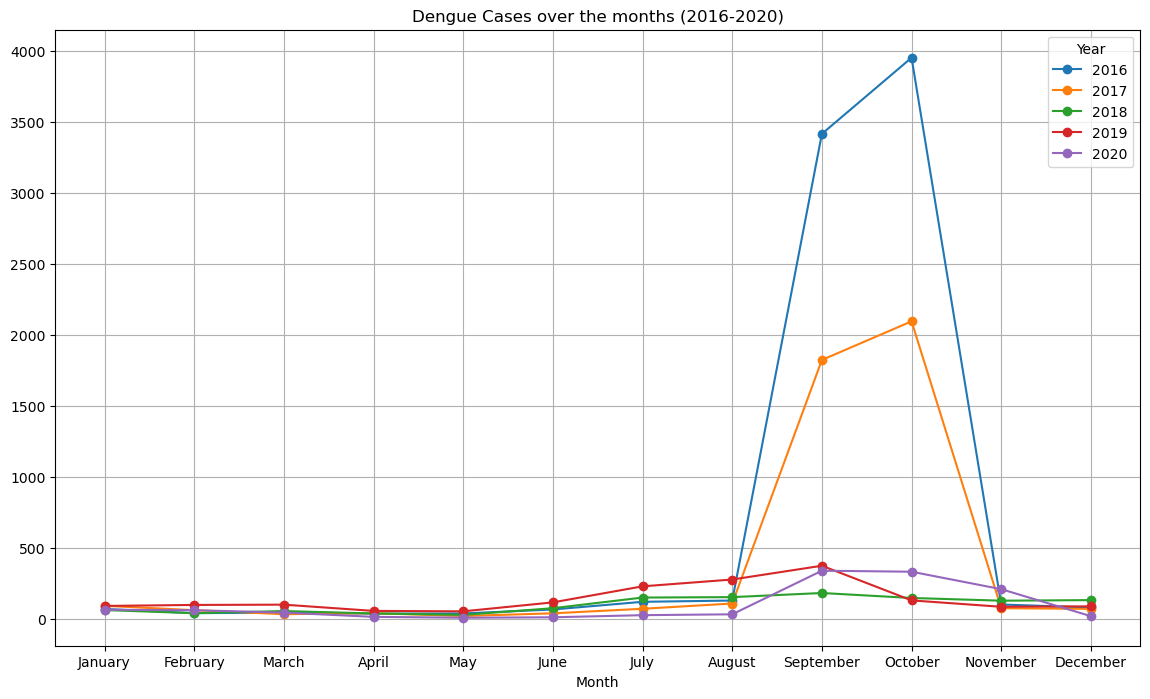

In [58]:
monthly_deaths.unstack().plot(kind='line', marker='o')
plt.title('Dengue Cases over the months (2016-2020)')
plt.gcf().set_size_inches(14,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()

<h1>Insights: </h1>

9. The visualization shows that dengue cases and deaths usually rise together, as months with more cases like August and September have the highest record of deaths over the years.
10. Early months such as January to May have fewer cases and deaths, showing that dengue is not as active during dry months.

<hr>